### 0) 

In [153]:
import pandas as pd

In [155]:
from scipy.io.arff import loadarff

data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


### 1)

In [158]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [160]:
from sklearn.feature_selection import f_classif

df_fclassif = pd.DataFrame({'Feature': X.columns, 'F-value': f_classif(X, y)[0]}).sort_values(by='F-value')

print(f"Least discriminative feature: {df_fclassif.iloc[0].iloc[0]}.\nMost discriminative feature: {df_fclassif.iloc[-1].iloc[0]}.")

Least discriminative feature: BloodPressure.
Most discriminative feature: Glucose.


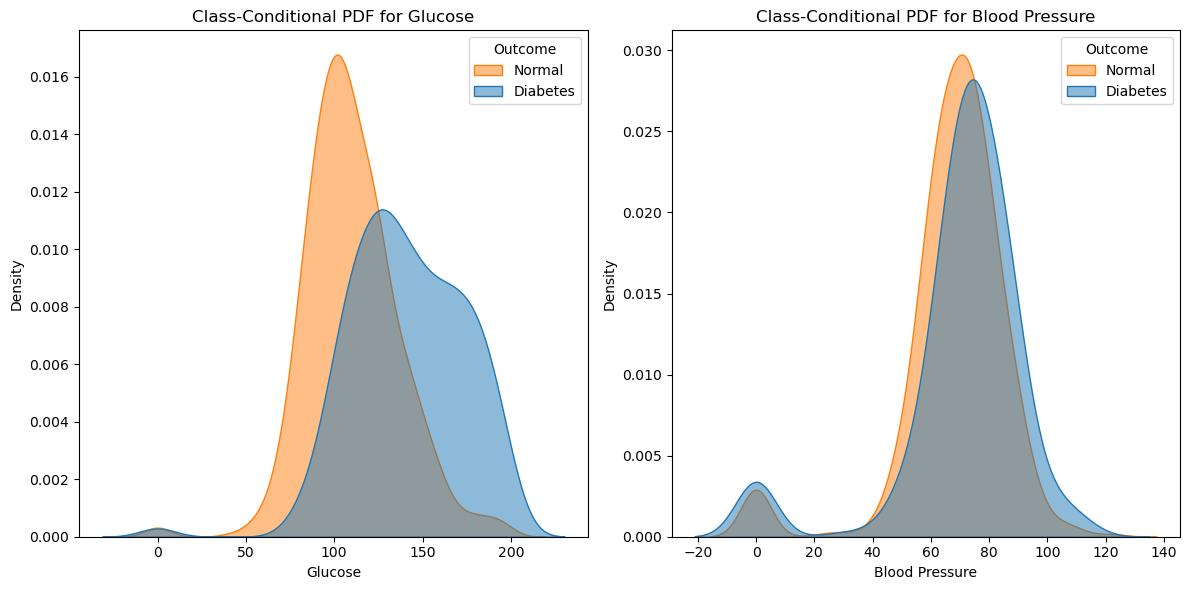

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Glucose', hue='Outcome', fill=True, common_norm=False, alpha=0.5)
plt.title('Class-Conditional PDF for Glucose')
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.legend(title='Outcome', labels=['Normal', 'Diabetes'])

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='BloodPressure', hue='Outcome', fill=True, common_norm=False, alpha=0.5)
plt.title('Class-Conditional PDF for Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.legend(title='Outcome', labels=['Normal', 'Diabetes'])

plt.tight_layout()
plt.show()

### 2)

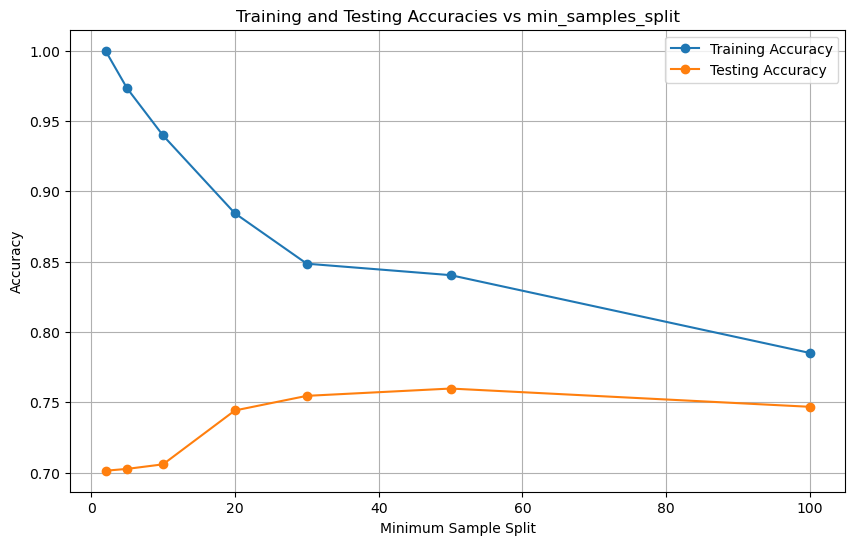

In [165]:
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1, stratify = y)

train_accuracies = []
test_accuracies = []

min_samples_splits = [2, 5, 10, 20, 30, 50, 100]
runs = 10

for e in min_samples_splits:
    sum_train = 0
    sum_test = 0
    for i in range(runs):
        predictor = tree.DecisionTreeClassifier(min_samples_split=e)
        
        predictor.fit(X_train, y_train)
        
        y_train_pred = predictor.predict(X_train)
        y_test_pred = predictor.predict(X_test)

        sum_train += metrics.accuracy_score(y_train, y_train_pred)
        sum_test += metrics.accuracy_score(y_test, y_test_pred)
        
    train_accuracies += [sum_train / runs]
    test_accuracies += [sum_test / runs]

plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Minimum Sample Split')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs min_samples_split')
plt.legend()
plt.grid(True)
plt.show()

### 3)

Em primeiro lugar, quando o minimum_sample_split é 2, a training accuracy é obviamente 1 porque todas as instâncias são classificadas nas suas verdadeiras classes. Não há nenhuma folha que contenha duas instâncias de classes diferentes. Mas isto tem um problema: o overfitting. Como vemos no gráfico, para o grupo de teste, a accuracy pode ser melhorada. O modelo tem um desempenho excelente no grupo de treino, mas tem pouca capacidade de generalização.

Para mitigar este problema, uma ideia é aumentar o minimum_sample_split. Podemos então olhar para o outro lado do espetro. Dado minimum_sample_split igual a 100, vemos uma diminuição na accuracy a nível do grupo de treino, embora a accuracy no grupo de teste tenha aumentado. Esta perda de accuracy pode ser evidência de underfitting.  

Por isso, há que encontrar um balanço da accuracy nos dois grupos. Analisando o gráfico, observamos que ter o minimum_sample_split entre 30 e 50 é o que nos dá esse tal balanço. A testing accuracy estabiliza daí para a frente e a training accuracy desce.

### 4)

#### i)

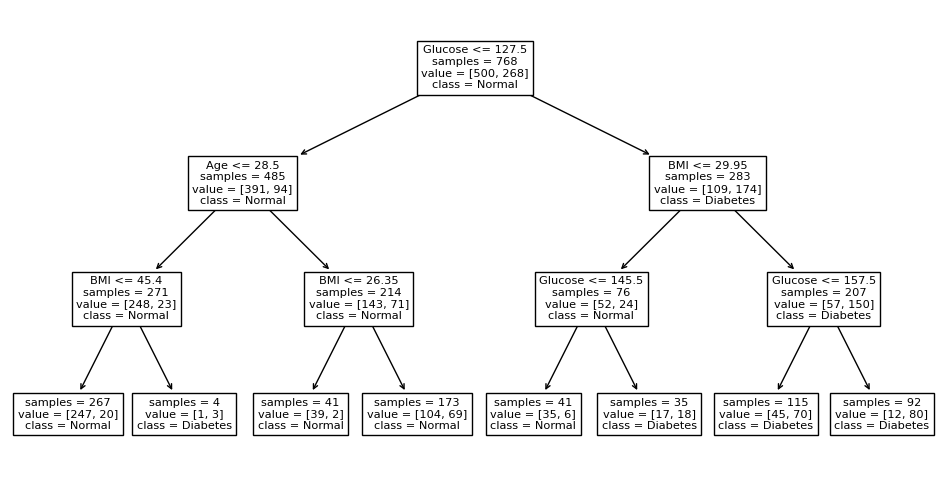

In [171]:
from sklearn.utils import Bunch

bunch_data = Bunch(
    data=df.drop(columns='Outcome').values,
    target=df['Outcome'].values,
    feature_names=df.columns[:-1].tolist(),
    target_names=df['Outcome'].unique().tolist()
)

X, y = bunch_data.data, bunch_data.target

predictor = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
predictor.fit(X, y)

figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=bunch_data.feature_names, class_names=['Normal', 'Diabetes'], impurity=False)
plt.show()

#### ii)

Glucose <= 127.5 & Age <= 28.5 & BMI <= 45.4 -> P(Diabetes) = 7.5%  
Glucose <= 127.5 & Age <= 28.5 & BMI > 45.4 -> P(Diabetes) = 75%  
Glucose <= 127.5 & Age > 28.5 & BMI <= 26.35 -> P(Diabetes) = 4.9%  
Glucose <= 127.5 & Age > 28.5 & BMI > 26.3 -> P(Diabetes) = 39.9%  
127.5 < Glucose <= 145.5 & BMI <= 29.95 -> P(Diabetes) = 14.6%  
Glucose > 145.5 & BMI <= 29.95 -> P(Diabetes) = 51.4%  
127.5 < Glucose <= 157.5 & BMI > 29.95 -> P(Diabetes) = 60.9%  
Glucose > 157.5 & BMI > 29.95 -> P(Diabetes) = 87%  